## Mid Term Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 1 Reading the Data

In [2]:
path = 'dataset/fitness_dataset.csv'

In [3]:
df = pd.read_csv(path)

### 1.1 Dataset Preparation, EDA and Cleaning

In [4]:
df.head()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        1840 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   object 
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.0+ KB


In [6]:
df.shape

(2000, 11)

In [7]:
df.columns

Index(['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure',
       'sleep_hours', 'nutrition_quality', 'activity_index', 'smokes',
       'gender', 'is_fit'],
      dtype='object')

In [8]:
df.dtypes

age                    int64
height_cm              int64
weight_kg              int64
heart_rate           float64
blood_pressure       float64
sleep_hours          float64
nutrition_quality    float64
activity_index       float64
smokes                object
gender                object
is_fit                 int64
dtype: object

#### Mapping the binary variables to numeric for modelling 

In [9]:
df['smokes'].value_counts()

smokes
yes    711
0      581
no     518
1      190
Name: count, dtype: int64

In [10]:
df['smokes'] = df['smokes'].map( 
    {
     'yes': 1,
     'no': 0,
     '1': 1,
     '0': 0
    }
)

In [11]:
df['smokes'].value_counts()

smokes
0    1099
1     901
Name: count, dtype: int64

In [12]:
df['gender'].value_counts()

gender
F    1030
M     970
Name: count, dtype: int64

In [13]:
df['gender'] = df['gender'].map( 
    {
     'M': 1,
     'F': 0,
    }
)

In [14]:
df = df.rename(columns={'gender': 'is_male'})

In [15]:
df['is_male'].value_counts()

is_male
0    1030
1     970
Name: count, dtype: int64

In [16]:
df.isnull().sum()

age                    0
height_cm              0
weight_kg              0
heart_rate             0
blood_pressure         0
sleep_hours          160
nutrition_quality      0
activity_index         0
smokes                 0
is_male                0
is_fit                 0
dtype: int64

In [17]:
df.describe()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,is_male,is_fit
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,1840.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000
mean,49.114000,174.53300,83.540500,70.288600,119.908850,7.513315,5.035140,2.999040,0.450500,0.4850,0.399500
std,17.926564,14.37175,25.852534,11.846339,14.578032,1.502031,2.864156,1.136383,0.497668,0.4999,0.489918
min,18.000000,150.00000,30.000000,45.000000,90.000000,4.000000,0.000000,1.000000,0.000000,0.0000,0.000000
25%,34.000000,162.00000,64.000000,62.100000,109.700000,6.500000,2.547500,2.037500,0.000000,0.0000,0.000000
50%,49.000000,174.00000,83.000000,70.250000,120.000000,7.500000,5.065000,2.980000,0.000000,0.0000,0.000000
75%,65.000000,187.00000,102.000000,78.425000,129.800000,8.600000,7.470000,3.950000,1.000000,1.0000,1.000000
max,79.000000,199.00000,250.000000,118.600000,171.200000,12.000000,10.000000,4.990000,1.000000,1.0000,1.000000


#### Box Plots

In [18]:
numeric_features = ['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure',
       'sleep_hours', 'nutrition_quality', 'activity_index','smokes','is_male']

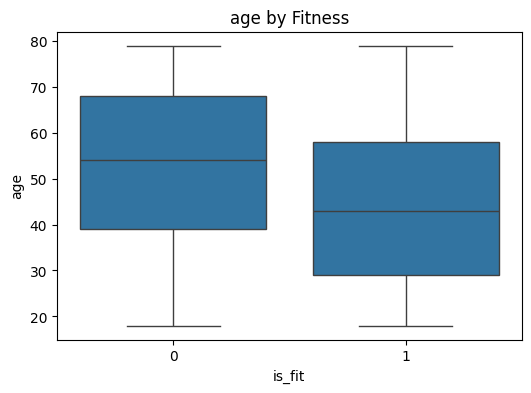

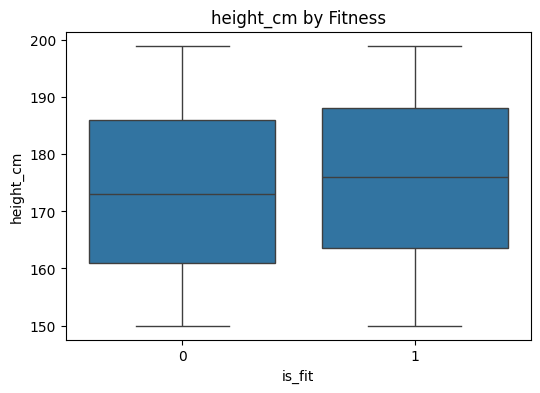

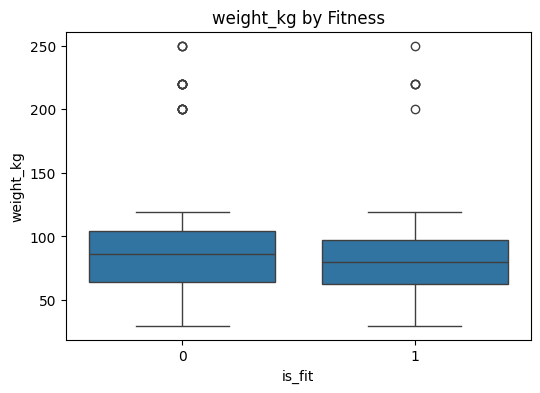

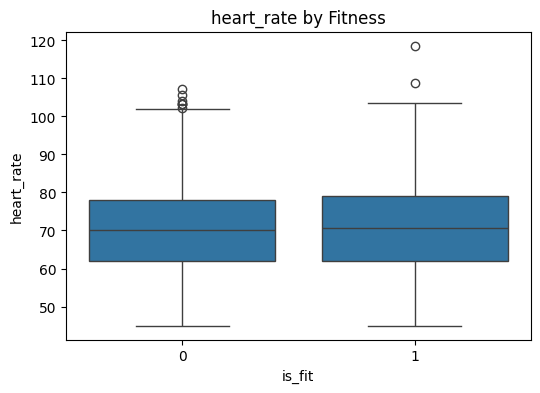

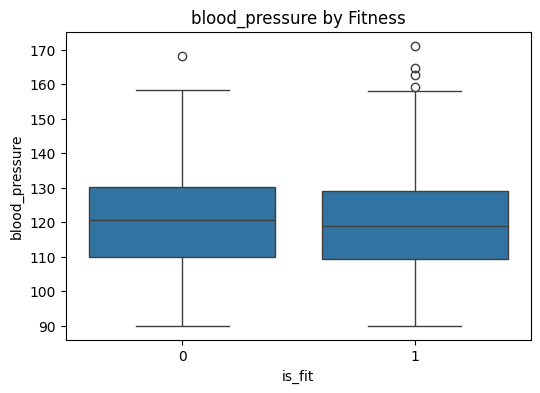

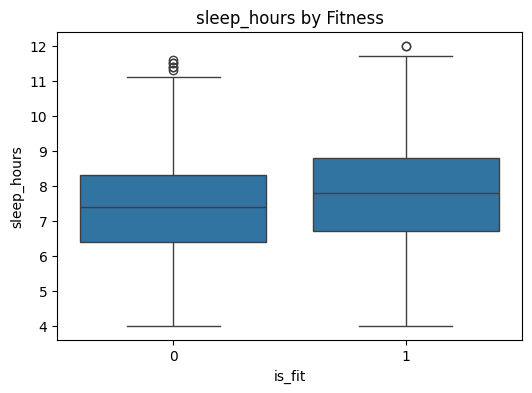

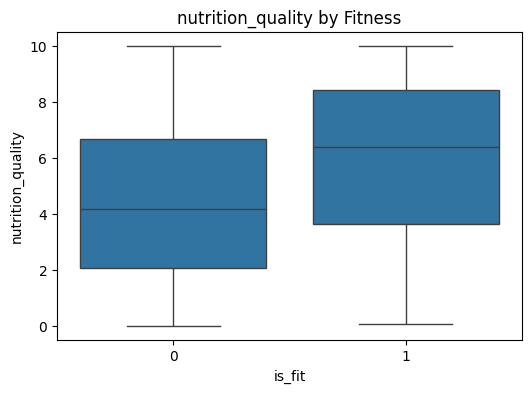

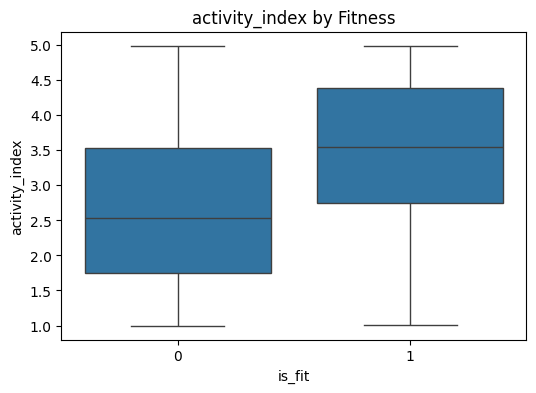

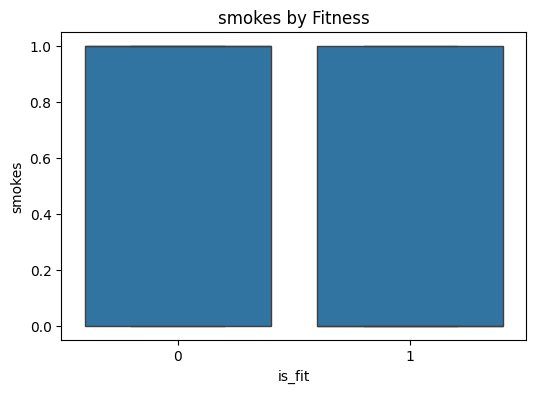

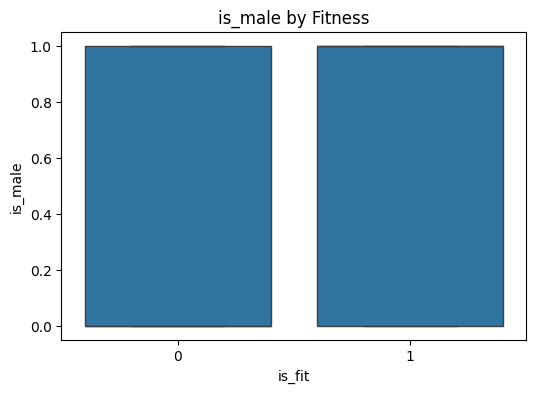

In [19]:
for col in numeric_features:
        plt.figure(figsize=(6,4))
        sns.boxplot(x='is_fit', y=col, data=df)
        plt.title(f'{col} by Fitness')
        plt.show()

## Validation Framework

In [20]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=1)

In [21]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)

In [22]:
len(df_train), len(df_val), len(df_test)

(1200, 400, 400)

In [23]:
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,is_male,is_fit
0,22,155,48,83.0,130.3,8.8,8.85,4.46,0,0,1
1,40,177,91,63.8,119.3,9.9,3.53,1.83,0,0,0
2,23,174,92,81.9,129.7,NaN,3.55,4.92,1,1,1
3,47,181,92,46.3,112.3,7.7,3.78,4.80,0,1,1
4,31,157,102,72.0,112.3,7.6,5.24,1.16,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,42,182,220,63.4,103.7,8.4,5.66,1.93,0,0,0
396,72,172,200,67.5,113.8,6.3,0.27,3.98,0,0,0
397,73,171,59,74.7,96.6,6.6,7.34,3.53,0,0,0
398,67,159,92,56.1,119.0,8.6,2.09,3.81,0,1,1


In [24]:
y_train = df_train.is_fit.values
y_val = df_val.is_fit.values
y_test = df_test.is_fit.values

In [25]:
len(y_train), len(y_val), len(y_test)

(1200, 400, 400)

In [26]:
del df_train['is_fit']
del df_val['is_fit']
del df_test['is_fit']

In [27]:
df_test.shape

(400, 10)

In [28]:
df_full_train['is_fit'].value_counts()

is_fit
0    948
1    652
Name: count, dtype: int64

In [29]:
df_full_train['is_fit'].value_counts(normalize=True)

is_fit
0    0.5925
1    0.4075
Name: proportion, dtype: float64

In [30]:
global_fit_rate = round(df_full_train['is_fit'].mean(),2)
global_fit_rate

np.float64(0.41)

## Logistic Regression Model

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
median_sleep_hours = df_train['sleep_hours'].median()
median_sleep_hours

np.float64(7.5)

In [33]:
df_train['sleep_hours'] = df_train['sleep_hours'].fillna(median_sleep_hours)

In [34]:
df_val['sleep_hours'] = df_val['sleep_hours'].fillna(median_sleep_hours)

In [35]:
X_train = df_train
X_val = df_val

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.01,0.1,1,10,100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=1),
                    param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

print("Best C:", grid.best_params_)

Best C: {'C': 10}


In [38]:
best_model = grid.best_estimator_
best_model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [39]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [40]:
# Predicted classes
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Predicted probabilities (optional, for ROC-AUC)
y_train_prob = model.predict_proba(X_train)[:,1]
y_val_prob = model.predict_proba(X_val)[:,1]

### Training metrics

In [41]:
from sklearn.metrics import classification_report, roc_auc_score
print("Training Metrics:")
print(classification_report(y_train, y_train_pred))
print("ROC-AUC:", round(roc_auc_score(y_train, y_train_prob),4))


Training Metrics:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       725
           1       0.76      0.70      0.73       475

    accuracy                           0.80      1200
   macro avg       0.79      0.78      0.78      1200
weighted avg       0.79      0.80      0.79      1200

ROC-AUC: 0.8612


### Validation metrics

In [42]:
print("Validation Metrics:")
print(classification_report(y_val, y_val_pred))
print("ROC-AUC:", round(roc_auc_score(y_val, y_val_prob),4))

Validation Metrics:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       223
           1       0.78      0.72      0.75       177

    accuracy                           0.79       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.79      0.79      0.79       400

ROC-AUC: 0.8566


### Outlier Detection - UNIVARIATE

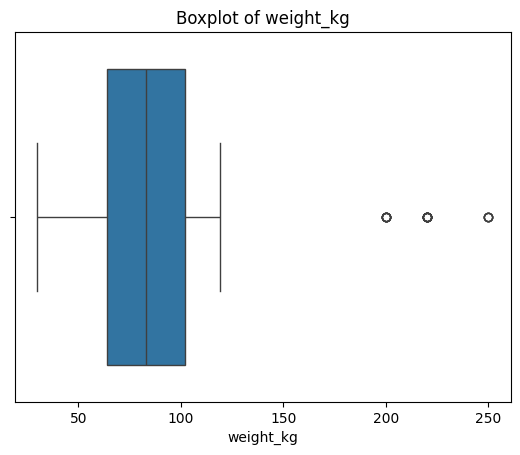

In [43]:
sns.boxplot(x=df['weight_kg'])
plt.title("Boxplot of weight_kg")
plt.show()

<Axes: xlabel='is_fit', ylabel='weight_kg'>

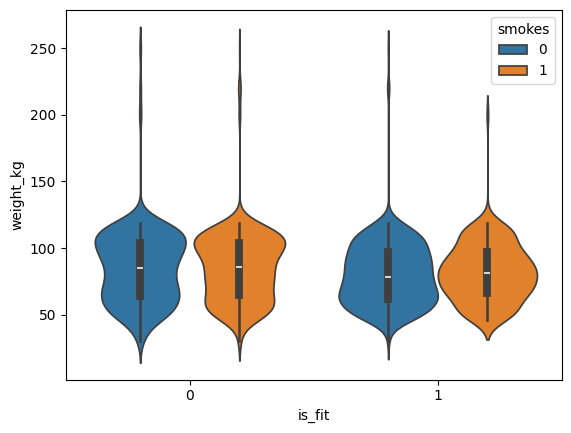

In [44]:
sns.violinplot(data=df, x='is_fit', y='weight_kg', hue='smokes')

In [45]:
box_plot_col = ['age',
 'height_cm',
 'weight_kg',
 'heart_rate',
 'blood_pressure',
 'sleep_hours',
 'nutrition_quality',
 'activity_index']